In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

1. Загрузите данные по вариантам в ноутбук.

In [2]:
def xlsx_input(path):
    df = pd.read_excel(path)
    df.columns = df.iloc[1]
    df.drop(labels = [0, 1], axis = 0, inplace = True)
    df = df.set_index("№")
    return df

In [3]:
df1 = xlsx_input(r"C:\Users\troll\Desktop\HW\ML\ML0.2\Вариант 1.xlsx")
df2 = xlsx_input(r"C:\Users\troll\Desktop\HW\ML\ML0.2\Вариант 2.xlsx")
df3 = xlsx_input(r"C:\Users\troll\Desktop\HW\ML\ML0.2\Вариант 3.xlsx")
df4 = xlsx_input(r"C:\Users\troll\Desktop\HW\ML\ML0.2\Вариант 4.xlsx")

2.Сделайте описательную статистику полученных данных.

In [4]:
df1

1,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
№,,,,,,,,,,
1.0,117,11,М,341,1+++--1+-++---0---------0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8,20,24
2.0,148,12А,М,338,1+---+0--+---+0----++-+-0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8,20,24
3.0,152,13,Ж,104,2-----0--+----1---------1,0(1)0(3)0(1)0(3)0(2)0(2)0(3)1(3)0(2)1(2)1(1)1(1),NaN,9,22,24
4.0,152,13,М,104,1+--+-0++-----2----++---0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,9,22,24
5.0,132,11,М,337,1++---0-+++---1----+----2,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,10,24,24
...,...,...,...,...,...,...,...,...,...,...
3045.0,147,11,Ж,340,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58,100,24
3046.0,147,11,Ж,338,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58,100,24
3047.0,147,11,Ж,337,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58,100,24


3. Найдите процент учащихся, выполнивших работу ниже среднего.

In [5]:
def find_percentage_below_average(df):
    return len(df.loc[df['Первичный балл'] < df['Первичный балл'].mean()])*100/len(df)

In [6]:
percentage_below_avg_1 = find_percentage_below_average(df1)
percentage_below_avg_2 = find_percentage_below_average(df2)
percentage_below_avg_3 = find_percentage_below_average(df3)
percentage_below_avg_4 = find_percentage_below_average(df4)
print(f'1 - {round(percentage_below_avg_1, 2)}%, 2 - {round(percentage_below_avg_2, 2)}%, 3 - {round(percentage_below_avg_3, 2)}%, 4 - {round(percentage_below_avg_4, 2)}%')

1 - 42.83%, 2 - 58.85%, 3 - 53.51%, 4 - 48.59%


4. Найти процент учащихся не сдавших экзамен.

In [7]:
def find_percentage_failed(df):
    return len(df.loc[df['Балл'] < df['Минимальный балл']])*100/len(df)

In [8]:
percentage_failed_1 = find_percentage_failed(df1)
percentage_failed_2 = find_percentage_failed(df2)
percentage_failed_3 = find_percentage_failed(df3)
percentage_failed_4 = find_percentage_failed(df4)
print(f'1 - {round(percentage_failed_1, 2)}%, 2 - {round(percentage_failed_2, 2)}%, 3 - {round(percentage_failed_3, 2)}%, 4 - {round(percentage_failed_4, 2)}%')

1 - 0.13%, 2 - 9.21%, 3 - 7.71%, 4 - 11.27%


5. Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.

In [9]:
def pie_pass_distr(df):
    passed_count = len(df.loc[df["Балл"] > df['Минимальный балл']])
    failed_count = len(df) - passed_count
    fig, ax = plt.subplots()
    ax.pie([passed_count, failed_count], labels = ["Сдали", "Провалили"], autopct='%1.1f%%')
    return fig, ax

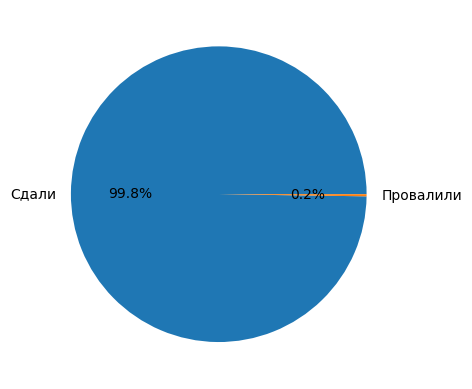

In [10]:
fig, ax = pie_pass_distr(df1)
plt.show()

6. Постройте ядерную оценку плотности распределению баллов за экзамен.

In [11]:
def kde_distr(df):
    fig, ax = plt.subplots()
    ax = df["Балл"].plot.kde()
    return fig, ax

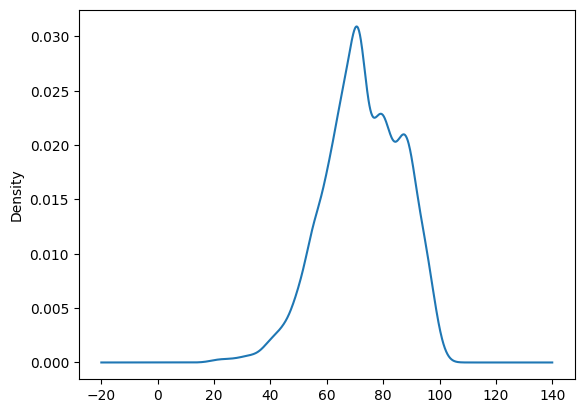

In [12]:
fig, ax = kde_distr(df1)
plt.show()

7. Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

In [13]:
def find_ratio_marks(df):
    un = round(len(df.loc[df['Балл'] <= 26])*100/len(df), 2)
    sa = round(len(df.loc[(df['Балл'] >= 27) & (df['Балл'] <= 49)])*100/len(df), 2)
    go = round(len(df.loc[(df["Балл"] >= 50) & (df['Балл'] <= 67)])*100/len(df), 2)
    ex = round(len(df.loc[df['Балл'] >= 68])*100/len(df), 2)
    print(f'неуд - {un}%, удовл - {sa}%, хор - {go}%, отл - {ex}%')
    return un, sa, go, ex

In [14]:
ratio_marks_1 = find_ratio_marks(df1)
ratio_marks_2 = find_ratio_marks(df2)
ratio_marks_3 = find_ratio_marks(df3)
ratio_marks_4 = find_ratio_marks(df4)

неуд - 0.26%, удовл - 4.53%, хор - 30.6%, отл - 64.61%
неуд - 9.21%, удовл - 38.78%, хор - 26.39%, отл - 25.58%
неуд - 2.03%, удовл - 48.35%, хор - 33.7%, отл - 15.92%
неуд - 4.93%, удовл - 19.72%, хор - 32.39%, отл - 42.96%


8. Какое процентное соотношение юношей и девушек писало данный экзамен?

In [15]:
def find_ratio_sex(df):
    male = round(len(df.loc[df['Пол'] == "М"])*100/len(df), 2)
    fem = round(len(df.loc[df['Пол'] == "Ж"])*100/len(df), 2)
    print(f'male - {male}%, female - {fem}%')
    return male, fem

In [16]:
ratio_sex_1 = find_ratio_sex(df1)
ratio_sex_2 = find_ratio_sex(df2)
ratio_sex_3 = find_ratio_sex(df3)
ratio_sex_4 = find_ratio_sex(df4)

male - 42.01%, female - 57.95%
male - 47.14%, female - 52.82%
male - 68.59%, female - 31.33%
male - 76.76%, female - 22.54%


9. Сколько школ принимало участие в экзамене?

In [17]:
def find_school_quantity(df):
    return df.groupby('№ школы').count().shape[0]

In [18]:
sch_quan_1 = find_school_quantity(df1)
sch_quan_2 = find_school_quantity(df2)
sch_quan_3 = find_school_quantity(df3)
sch_quan_4 = find_school_quantity(df4)

print(f'кол-во школ представленных на экзамене:\n#1 - {sch_quan_1}\n#2 - {sch_quan_2}\n#3 - {sch_quan_3}\n#4 - {sch_quan_4}')

кол-во школ представленных на экзамене:
#1 - 24
#2 - 17
#3 - 19
#4 - 10


10. Сколько всего заданий с кратким ответом? С развернутым ответом? 

In [19]:
# подразумевается, что задания в каждом варианте уникальные. Мы ищем множество таких заданий
def find_short_ans_qu(df):
    vars_quan = df.groupby('Номер варианта').count().shape[0]
    return vars_quan * len(df['Задания с кратким ответом'].iloc[0])

In [20]:
def find_ext_ans_qu(df):
    vars_quan = df.groupby('Номер варианта').count().shape[0]
    num = list(df['Задания с развёрнутым ответом'].iloc[0]).count('(') 
    return vars_quan * num

In [21]:
short_1, ex_1 = find_short_ans_qu(df1), find_ext_ans_qu(df1)
short_2, ex_2 = find_short_ans_qu(df2), find_ext_ans_qu(df2)
short_3, ex_3 = find_short_ans_qu(df3), find_ext_ans_qu(df3)
short_4, ex_4 = find_short_ans_qu(df4), find_ext_ans_qu(df4)

print(f'кол-во уникальных заданий(с кратким ответом/развернутым ответом):\n{short_1}||{ex_1}\n{short_2}||{ex_2}\n{short_3}||{ex_3}\n{short_4}||{ex_4}')

кол-во уникальных заданий(с кратким ответом/развернутым ответом):
850||408
384||224
540||100
299||52


11. Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В
, ... Вк
 Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.

In [22]:
def countB(df):
    done = 0
    undone = 0
    for item in df['Задания с кратким ответом'].tolist():
        if isinstance(item, str):
            for char in item:
                if char == '+' or (char.isdigit() and char != '0'):
                    done+=1;
                else:
                    undone +=1
    overall = done+undone
    print(f'выполн - {round(done*100/overall, 2)}%, undone - {round(undone*100/overall, 2)}%')
    return done/overall, undone/overall


In [23]:
B_ratio_1 = countB(df1)
B_ratio_2 = countB(df2)
B_ratio_3 = countB(df3)
B_ratio_4 = countB(df4)

выполн - 78.25%, undone - 21.75%
выполн - 73.68%, undone - 26.32%
выполн - 65.23%, undone - 34.77%
выполн - 58.96%, undone - 41.04%


12. Аналогично и с типом С (ответы с развернутым ответом)

In [24]:
def countC(df):
    done = 0
    undone = 0
    for item in df['Задания с развёрнутым ответом'].tolist():
        if isinstance(item, str):
            ind = 0
            while ind < (len(item)):
                if item[ind].isdigit() and item[ind]!='0':
                    done += 1
                if item[ind] == '0':
                    undone += 1
                ind += 4
    overall = done+undone
    print(f'выполн - {round(done*100/overall, 2)}%, undone - {round(undone*100/overall, 2)}%')
    return done/overall, undone/overall         

In [25]:
C_ratio_1 = countC(df1)
C_ratio_2 = countC(df2)
C_ratio_3 = countC(df3)
C_ratio_4 = countC(df4)

выполн - 91.37%, undone - 8.63%
выполн - 10.85%, undone - 89.15%
выполн - 25.47%, undone - 74.53%
выполн - 50.35%, undone - 49.65%


13. Сделайте анализ по двум школам:\
по всем выполненным заданиям типа В\
по заданиям типа С больше 50%\
по среднему баллу юношей и девушек

In [26]:
def b_comparison(df, sch_num1, sch_num2):
    sch_1_df = df[df["№ школы"] == sch_num1]
    sch_2_df = df[df["№ школы"] == sch_num2]
    sch_1_rat = countB(sch_1_df)
    sch_2_rat = countB(sch_2_df)
    return sch_1_rat, sch_2_rat
    

In [27]:
sch_comp = b_comparison(df1, 117, 148)
print(f'\nшкола #1 выполнила {round(sch_comp[0][0]*100, 2)}% заданий B-типа\nшкола #2 выполнила {round(sch_comp[1][0]*100, 2)}% заданий B-типа')

выполн - 77.52%, undone - 22.48%
выполн - 78.57%, undone - 21.43%

школа #1 выполнила 77.52% заданий B-типа
школа #2 выполнила 78.57% заданий B-типа


In [28]:
def c_ratio(df, comp_percent):
    max_str = df['Задания с развёрнутым ответом'].iloc[0]
    max_points = 0
    comp_percent /= 100
    ind = 0
    while ind < len(max_str):
        if max_str[ind] == '(':
            max_points += int(max_str[ind+1])
        ind+=1;
    more = 0
    less_eq = 0
    for item in df['Задания с развёрнутым ответом'].tolist():
        if isinstance(item, str):
            cur = 0
            ind = 0
            while ind < len(item):
                if item[ind].isdigit():
                    cur += int(item[ind])
                    ind += 4
            if cur/max_points > comp_percent:
                more += 1
            else:
                less_eq += 1
    return more, less_eq

In [29]:
def c_comp(df, sch_num_1, sch_num_2, percent):
    sch_1_df = df[df["№ школы"] == sch_num_1]
    sch_2_df = df[df["№ школы"] == sch_num_2]
    sch_1_rat = c_ratio(sch_1_df, 50)[0]/len(sch_1_df)
    sch_2_rat = c_ratio(sch_2_df, 50)[0]/len(sch_2_df)
    return sch_1_rat, sch_2_rat

In [30]:
sch_comp_2 = c_comp(df1, 117, 148, 50)
print(f'школа #1 выполнила {round(sch_comp_2[0]*100, 2)}% заданий C-типа на больше чем 50%\nшкола #2 выполнила {round(sch_comp_2[1]*100, 2)}% заданий C-типа на больше чем 50%')

школа #1 выполнила 85.26% заданий C-типа на больше чем 50%
школа #2 выполнила 84.62% заданий C-типа на больше чем 50%


In [36]:
sch_comp_3_df = df1[(df1["№ школы"]  == 117) | (df1["№ школы"]  == 148)]
temp_df = pd.DataFrame({"Школа": [117, 148]})
temp_df['Ср.балл по Ж'] = df1[(df1["№ школы"] == 117) & (df1['Пол'] == 'Ж')]['Балл'].mean(), df1[(df1["№ школы"] == 148) & (df1['Пол'] == 'Ж')]['Балл'].mean()
temp_df['Ср.балл по М'] = df1[(df1["№ школы"] == 117) & (df1['Пол'] == 'М')]['Балл'].mean(), df1[(df1["№ школы"] == 148) & (df1['Пол'] == 'М')]['Балл'].mean()
temp_df

,Школа,Ср.балл по Ж,Ср.балл по М
0,117,75.686275,65.022727
1,148,75.745856,68.166667


14. Для каждого задания добавьте соответствующий раздел в ноутбук и текстовые пояснения.